In [142]:
import os
import warnings  # 解除警告

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, Subset
from torchvision import datasets, transforms
from torchvision.datasets import ImageFolder  # IF会自动遍历指定目录下的所有子目录，并将每个子目录中的图像文件视为同一类别的数据
from PIL import Image  # pip install Pillow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [143]:
data_path = r'C:\Users\16654\Desktop\train\dataset2'

# 定义数据转换方法
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # 调整图像大小
    transforms.ToTensor(),  #将数据转换为张量
])
# 创建自己的图像数据集
dataset = ImageFolder(data_path, transform=transform)
# 可查看数据集属性：len(dataset)、dataset.classes、dataset.class_to_idx

In [144]:
def plot_from_dataset(dataset, nrows=5, ncols=5, shuffle=True, cmap=None):
    # 数据加载器
    dataloader = DataLoader(dataset, batch_size=(nrows * ncols), shuffle=shuffle)
    # 取出一组数据
    images, labels = next(iter(dataloader))
    images = np.transpose(images, (0, 2, 3, 1))
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8, 8))
    # 遍历每个子图 绘制图像并添加子图标题
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap=cmap)
        ax.axis('off')  # 隐藏坐标轴
        if hasattr(dataset, 'classes'):
            ax.set_title(dataset.classes[labels[i]], fontsize=12)
        else:
            ax.set_title(labels[i], fontsize=12)
    plt.show()

In [145]:
def show_img_transform(transform, cmap=None):
    dataset = ImageFolder(data_path, transform=transform)  #%%


import os
import warnings  # 解除警告

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, Subset
from torchvision import datasets, transforms
from torchvision.datasets import ImageFolder  # IF会自动遍历指定目录下的所有子目录，并将每个子目录中的图像文件视为同一类别的数据
from PIL import Image  # pip install Pillow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [146]:
data_path = r'C:\Users\16654\Desktop\train\dataset2'

# 定义数据转换方法
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # 调整图像大小
    transforms.ToTensor(),  #将数据转换为张量
])
# 创建自己的图像数据集
dataset = ImageFolder(data_path, transform=transform)
# 可查看数据集属性：len(dataset)、dataset.classes、dataset.class_to_idx

In [147]:
def plot_from_dataset(dataset, nrows=5, ncols=5, shuffle=True, cmap=None):
    # 数据加载器
    dataloader = DataLoader(dataset, batch_size=(nrows * ncols), shuffle=shuffle)
    # 取出一组数据
    images, labels = next(iter(dataloader))
    images = np.transpose(images, (0, 2, 3, 1))
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))
    # 遍历每个子图 绘制图像并添加子图标题
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap=cmap)
        ax.axis('off')  # 隐藏坐标轴
        # if hasattr(dataset, 'classes'):
        #     ax.set_title(dataset.classes[labels[i]], fontsize=12)
        # else:
        #     ax.set_title(labels[i], fontsize=6)
    plt.show()

In [159]:
def show_img_transform(transform, cmap=None):
    dataset = ImageFolder(data_path, transform=transform)
    subset = Subset(dataset, [i for i in range(4)])
    plot_from_dataset(dataset, 5, 1, False, cmap)

# 定义数据转换的方法

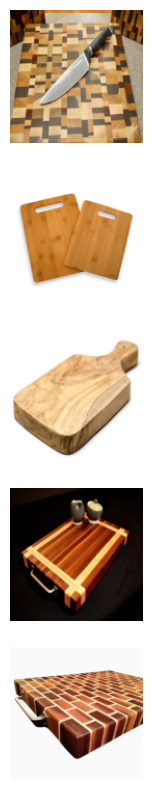

In [160]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])
# dataset = ImageFolder(data_path, transform)
# plot_from_dataset(dataset, 2, 2, False)
show_img_transform(transform)

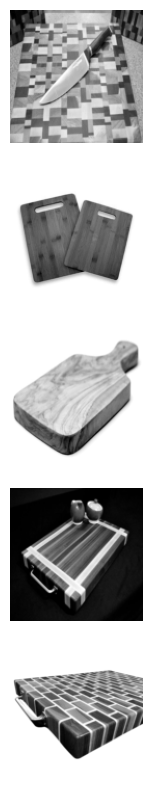

In [161]:
transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.Resize((128,128)),
    transforms.ToTensor(),
])
show_img_transform(transform,cmap='gray')

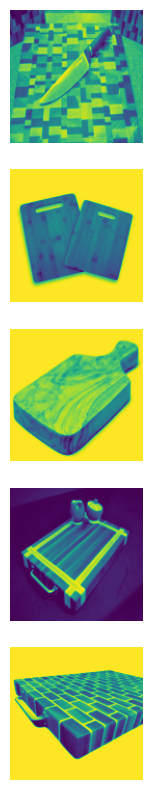

In [162]:
transfor = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
show_img_transform(transform)

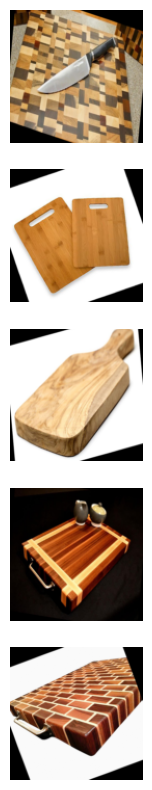

In [163]:
transform = transforms.Compose([
    transforms.RandomRotation(degrees=90),
    transforms.Resize((128,128)),
    transforms.ToTensor(),
])
show_img_transform(transform)

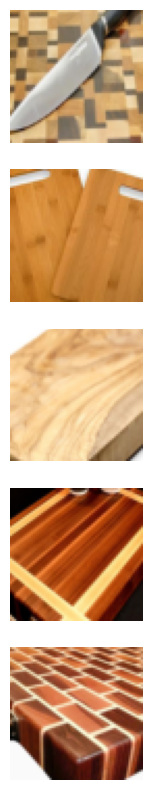

In [164]:
transform = transforms.Compose([
    transforms.Resize((128, 128)), # 调整图像大小为128x128
    transforms.CenterCrop(64), # 从中心位置开始裁剪指定大小
    transforms.ToTensor(),  # 将数据转换为张量
])
show_img_transform(transform)

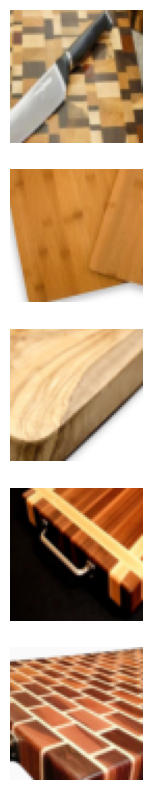

In [165]:
transform = transforms.Compose([
    transforms.Resize((128, 128)), # 调整图像大小为128x128
    transforms.RandomCrop(64), # 从随机位置开始裁剪指定大小
    transforms.ToTensor(),  # 将数据转换为张量
])
show_img_transform(transform)

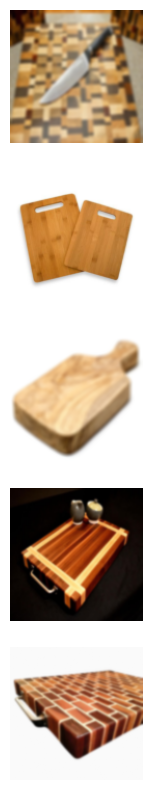

In [166]:
transform = transforms.Compose([
    transforms.Resize((128, 128)), # 调整图像大小为128x128
    transforms.GaussianBlur((5, 5)), # 对图像进行高斯模糊处理，高斯核大小为5x5
    transforms.ToTensor(),  # 将数据转换为张量
])
show_img_transform(transform)

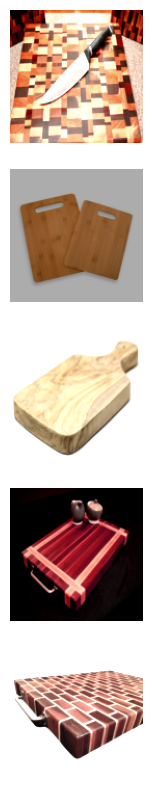

In [167]:
transform = transforms.Compose([
    transforms.Resize((128, 128)), # 调整图像大小为128x128
    transforms.ColorJitter( # 色彩随机调节
        brightness=(0.5, 1.5), # 亮度
        contrast=(0.5, 1.5), # 对比度
        saturation=(0.5, 1.5), # 饱和度
        hue=(-0.1, 0.1) # 色调
    ),
    transforms.ToTensor(),  # 将数据转换为张量
])
show_img_transform(transform)

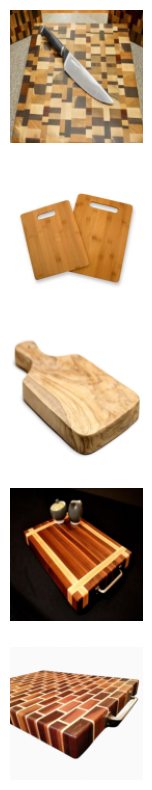

In [168]:
transform = transforms.Compose([
    transforms.Resize((128, 128)), # 调整图像大小为128x128
    transforms.RandomHorizontalFlip(p = 1), # 随机水平翻转
    transforms.ToTensor(),  # 将数据转换为张量
])
show_img_transform(transform)

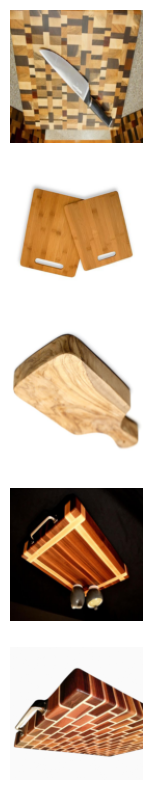

In [169]:
transform = transforms.Compose([
    transforms.Resize((128, 128)), # 调整图像大小为128x128
    transforms.RandomVerticalFlip(p = 1), # 随机垂直翻转
    transforms.ToTensor(),  # 将数据转换为张量
])
show_img_transform(transform)

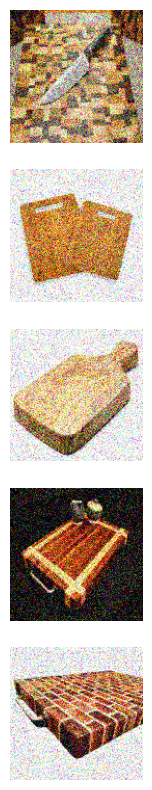

In [170]:
# 自定义AddNoise方法，用于向输入图像中添加噪声
class AddNoise():
    def __init__(self, noise_factor=0.2): # 噪声系数
        self.noise_factor = noise_factor

    def __call__(self, image):
        noisy = image + torch.randn_like(image) * self.noise_factor # 向输入图像中添加随机噪声
        noisy = torch.clamp(noisy, 0.0, 1.0) # 将噪声图像像素值限制在[0, 1]之间
        return noisy

transform = transforms.Compose([
    transforms.Resize((128, 128)), # 调整图像大小为128x128
    transforms.ToTensor(),  # 将数据转换为张量
    AddNoise(), # 自定义方法，添加噪点
])
show_img_transform(transform)